# Student Alcohol Consumption Analysiss

## Introduction
This Jupyter Notebook aims to analyze the factors influencing alcohol consumption among secondary school students. By exploring the dataset, we will gain insights into how various social, educational, and personal factors affect students' alcohol consumption patterns and academic performance.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Data Visualization](#data-visualization)
6. [Correlation Analysis](#correlation-analysis)
7. [Data Preparation](#data-preparation)
8. [Modeling](#modeling)
9. [Model Evaluation](#model-evaluation)
10. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation <a name="package-installation"></a>
In this cell, we will install the necessary Python packages required for our data analysis project. This step ensures that all the libraries needed for data manipulation, visualization, and machine learning are available in our environment. 

We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical computations and handling arrays.
- **Pandas**: A powerful data manipulation and analysis library, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive graphics.
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis.

In [2]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

The following libraries are missing: scikit-learn
Starting installation...
Installing scikit-learn...
scikit-learn installed successfully.
Error: scikit-learn was not installed correctly.
Some libraries were not installed correctly.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about students' alcohol consumption and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [4]:
# Paths to the CSV files
path_data_math = '../data/student-mat.csv'
path_data_port = '../data/student-por.csv'

# Reading the CSV files
data_math = pd.read_csv(path_data_math)
data_port = pd.read_csv(path_data_port)

In [5]:
# Display the first few rows of each dataset to verify the reading
print("Mathematics Data:")
print(data_math.head())
print("\nPortuguese Data:")
print(data_port.head())

Mathematics Data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Portuguese Data:
  school sex  age address famsize Pstatus  Medu  Fed

In [6]:
# Concatenating the two DataFrames
combined_data = pd.merge(data_math, data_port, on=["school", "sex", "age", "address", "famsize", 
                             "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", 
                             "reason", "nursery", "internet"])

# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", combined_data.shape)


Shape of Combined Data: (382, 53)


## Initial Data Exploration <a name="initial-data-exploration"></a>
In this section, we will perform an exploratory data analysis (EDA) to understand the dataset better. We will look at the data types, summary statistics, and any missing values, which will help us determine the next steps for cleaning and preparing the data.

In [7]:
# 1. Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian_x      0
traveltime_x    0
studytime_x     0
failures_x      0
schoolsup_x     0
famsup_x        0
paid_x          0
activities_x    0
nursery         0
higher_x        0
internet        0
romantic_x      0
famrel_x        0
freetime_x      0
goout_x         0
Dalc_x          0
Walc_x          0
health_x        0
absences_x      0
G1_x            0
G2_x            0
G3_x            0
guardian_y      0
traveltime_y    0
studytime_y     0
failures_y      0
schoolsup_y     0
famsup_y        0
paid_y          0
activities_y    0
higher_y        0
romantic_y      0
famrel_y        0
freetime_y      0
goout_y         0
Dalc_y          0
Walc_y          0
health_y        0
absences_y      0
G1_y            0
G2_y            0
G3_y            0
dtype: int64


In [8]:
# 2. Check data types
data_types = combined_data.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian_x      object
traveltime_x     int64
studytime_x      int64
failures_x       int64
schoolsup_x     object
famsup_x        object
paid_x          object
activities_x    object
nursery         object
higher_x        object
internet        object
romantic_x      object
famrel_x         int64
freetime_x       int64
goout_x          int64
Dalc_x           int64
Walc_x           int64
health_x         int64
absences_x       int64
G1_x             int64
G2_x             int64
G3_x             int64
guardian_y      object
traveltime_y     int64
studytime_y      int64
failures_y       int64
schoolsup_y     object
famsup_y        object
paid_y          object
activities_y    object
higher_y        object
roman

In [9]:
# 3. Correcting Data Types for Categorical Variables

# List the columns to convert to categorical
columns_to_convert = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian_x',
    'guardian_y', 'schoolsup_x', 'schoolsup_y', 'famsup_x',
    'famsup_y', 'paid_x', 'paid_y', 'activities_x', 'activities_y', 
    'nursery', 'higher_x', 'higher_y', 'internet', 'romantic_x',
    'romantic_y', 'traveltime_x', 'traveltime_y','studytime_x',
    'studytime_y', 'failures_x', 'failures_y', 'famrel_x', 'famrel_y',
    'freetime_x', 'freetime_y', 'goout_x', 'goout_y', 'Dalc_x', 'Dalc_y',
    'Walc_x', 'Walc_y', 'health_x', 'health_y'
]

# Convert the specified columns to 'category' type
combined_data[columns_to_convert] = combined_data[columns_to_convert].astype('category')

# Check the data types after conversion
print("Updated Data Types of Each Column:")
print(combined_data.dtypes)

Updated Data Types of Each Column:
school          category
sex             category
age                int64
address         category
famsize         category
Pstatus         category
Medu            category
Fedu            category
Mjob            category
Fjob            category
reason          category
guardian_x      category
traveltime_x    category
studytime_x     category
failures_x      category
schoolsup_x     category
famsup_x        category
paid_x          category
activities_x    category
nursery         category
higher_x        category
internet        category
romantic_x      category
famrel_x        category
freetime_x      category
goout_x         category
Dalc_x          category
Walc_x          category
health_x        category
absences_x         int64
G1_x               int64
G2_x               int64
G3_x               int64
guardian_y      category
traveltime_y    category
studytime_y     category
failures_y      category
schoolsup_y     category
famsup_y       

In [10]:
# 4. Summary statistics for numerical columns
summary_statistics = combined_data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
               age  absences_x        G1_x        G2_x        G3_x  absences_y  \
count  382.000000  382.000000  382.000000  382.000000  382.000000  382.000000   
mean    16.586387    5.319372   10.861257   10.712042   10.387435    3.672775   
std      1.173470    7.625251    3.349167    3.832560    4.687242    4.905965   
min     15.000000    0.000000    3.000000    0.000000    0.000000    0.000000   
25%     16.000000    0.000000    8.000000    8.250000    8.000000    0.000000   
50%     17.000000    3.000000   10.500000   11.000000   11.000000    2.000000   
75%     17.000000    8.000000   13.000000   13.000000   14.000000    6.000000   
max     22.000000   75.000000   19.000000   19.000000   20.000000   32.000000   

             G1_y        G2_y        G3_y  
count  382.000000  382.000000  382.000000  
mean    12.112565   12.238220   12.515707  
std      2.556531    2.468341    2.945438  
min      0.000000    5.000000    0.000000  
25%     10.000000   11.00000

In [11]:
# 5. Check unique values in categorical columns
for column in combined_data.select_dtypes(include=['category']).columns:
    print(f"\nUnique Values in '{column}':\n", combined_data[column].value_counts())


Unique Values in 'school':
 school
GP    342
MS     40
Name: count, dtype: int64

Unique Values in 'sex':
 sex
F    198
M    184
Name: count, dtype: int64

Unique Values in 'address':
 address
U    301
R     81
Name: count, dtype: int64

Unique Values in 'famsize':
 famsize
GT3    278
LE3    104
Name: count, dtype: int64

Unique Values in 'Pstatus':
 Pstatus
T    344
A     38
Name: count, dtype: int64

Unique Values in 'Medu':
 Medu
4    135
2     98
3     95
1     51
0      3
Name: count, dtype: int64

Unique Values in 'Fedu':
 Fedu
2    105
3     99
4     99
1     77
0      2
Name: count, dtype: int64

Unique Values in 'Mjob':
 Mjob
other       138
services     96
teacher      62
at_home      53
health       33
Name: count, dtype: int64

Unique Values in 'Fjob':
 Fjob
other       211
services    107
teacher      31
health       17
at_home      16
Name: count, dtype: int64

Unique Values in 'reason':
 reason
course        140
home          110
reputation     98
other          34
Name

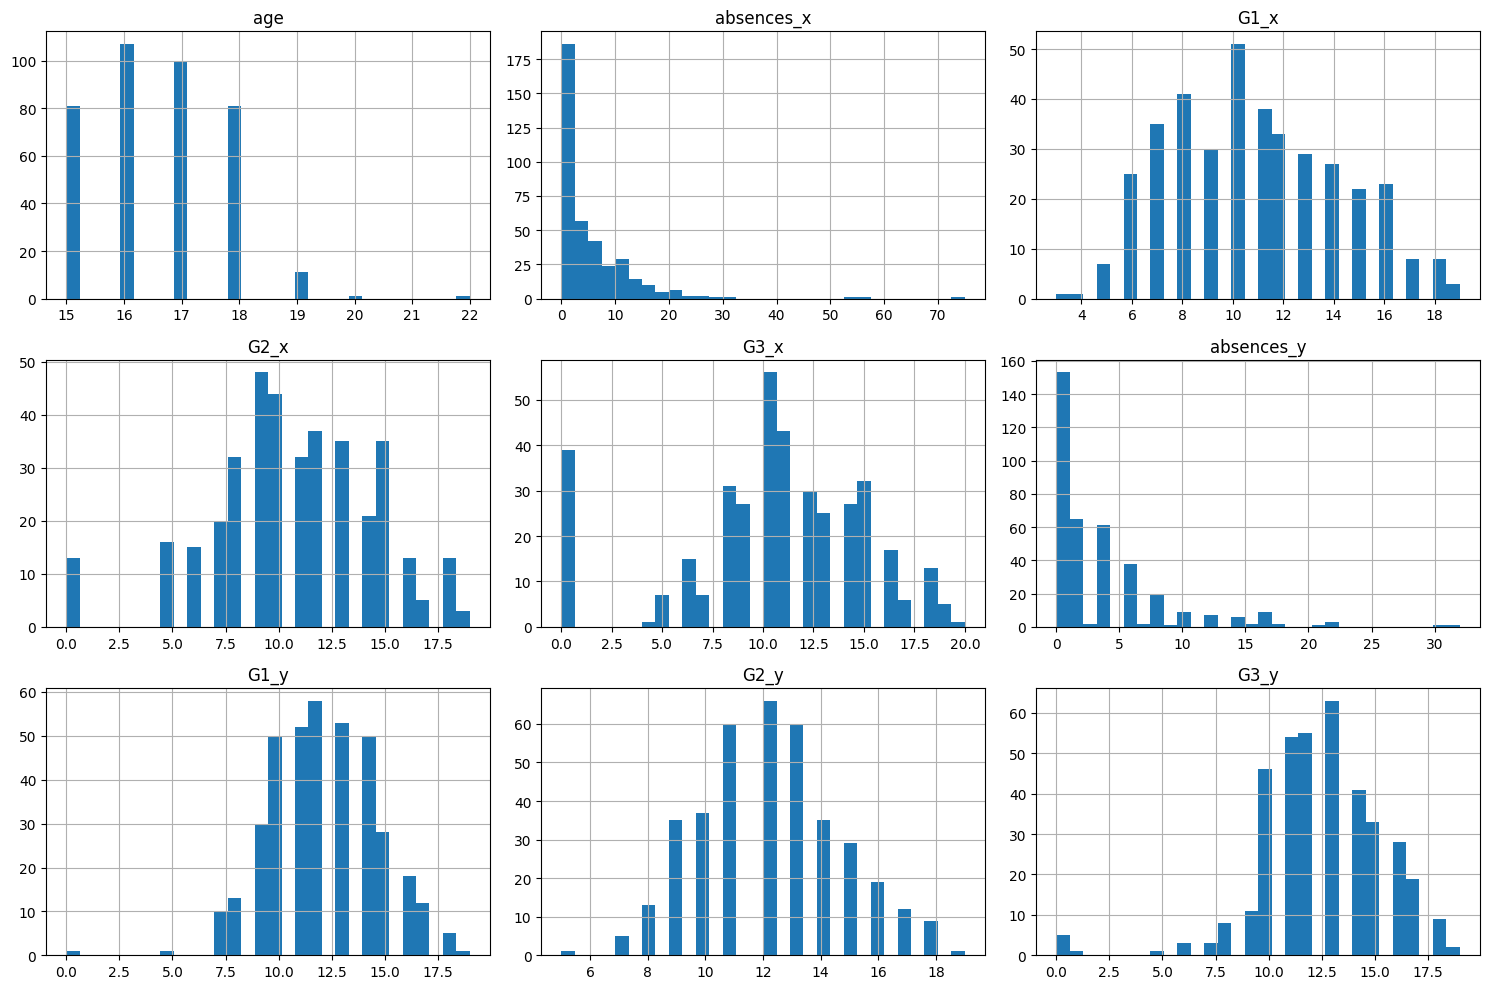

In [12]:
# 6. Visualize distributions for numerical columns using histograms
combined_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# 7. Create boxplots to check for outliers in numerical columns
for column in combined_data.select_dtypes(exclude=['category']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=combined_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

After analyzing the outliers in the dataset, we have decided to retain them as they represent valid data points that are relevant for subsequent evaluations.

## Data Visualization <a name="data-visualization"></a>
Data visualization is key to understanding trends and patterns in our data. In this cell, we will create various plots to visualize the relationships between different variables, including alcohol consumption and academic performance.

## Correlation Analysis <a name="correlation-analysis"></a>
We will analyze the correlations between numerical features in the dataset. This will help us identify which factors are most strongly related to alcohol consumption and academic performance.


## Data Preparation <a name="data-preparation"></a>
Before modeling, we need to prepare the data. This includes handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

## Modeling <a name="modeling"></a>
In this section, we will build machine learning models to predict students' academic performance based on their alcohol consumption and other features. We will choose appropriate algorithms and fit them to our training data.

## Model Evaluation <a name="model-evaluation"></a>
After building our models, we will evaluate their performance using various metrics. We will compare the predictions against the actual outcomes to determine how well our models are performing.

## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In the final section, we will summarize our findings from the analysis and discuss potential next steps. This may include further analysis, model improvements, or recommendations for educators based on the insights gained from the data.